In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4\DATA/iris.csv')

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='species'>

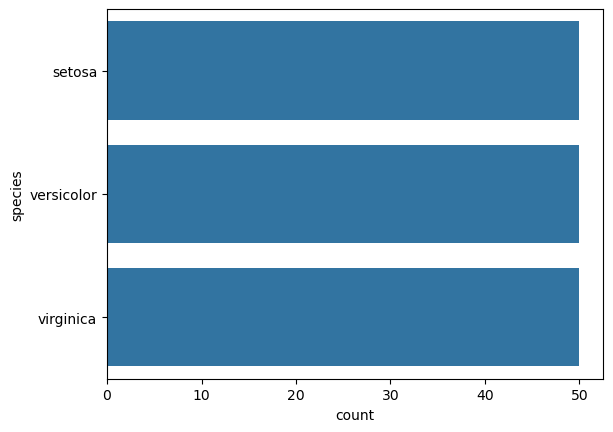

In [24]:
sns.countplot(df['species'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

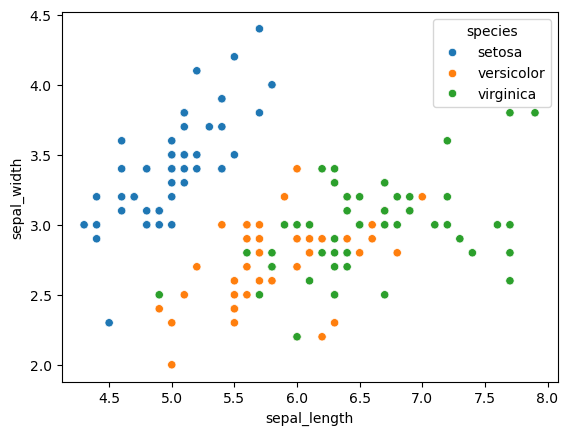

In [25]:
sns.scatterplot(data=df , x='sepal_length' , y='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

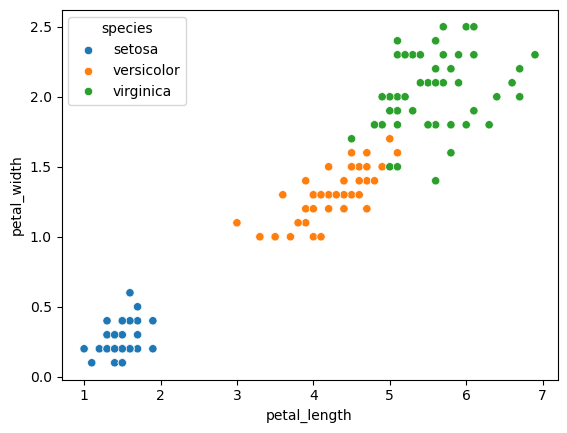

In [26]:
sns.scatterplot(data=df , x='petal_length' , y='petal_width',hue='species')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [28]:
x = df.drop('species' , axis=1)
y = df['species']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [30]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [31]:
log_model = LogisticRegression(solver='saga' , multi_class='ovr' , max_iter=5000)

This initializes a Logistic Regression model with:
✅ solver='saga' → Uses the SAGA optimizer, which is good for large datasets and supports L1/L2 regularization.
✅ multi_class='ovr' → Uses One-vs-Rest (OvR) strategy for multi-class classification.
✅ max_iter=5000 → Increases the number of iterations for better convergence

In [32]:
penality = ['l1','l2']
C = np.logspace(0,4,10)

This defines the hyperparameters that will be tested in GridSearchCV:
🔹 penalty = ['l1', 'l2'] → Tests L1 (Lasso) and L2 (Ridge) regularization.
🔹 C = np.logspace(0,4,10) → Generates 10 values for C in the range 10⁰ to 10⁴ (from 1 to 10,000).

 C controls the strength of regularization.
Higher C → Less regularization (model is more flexible).
Lower C → More regularization (model is simpler and prevents overfitting).
## 📌 Note: C is the inverse of the regularization strength (λ, alpha in mathematical terms)

In [33]:
grid_model = GridSearchCV(log_model,param_grid={'C':C , 'penalty' : penality})

GridSearchCV is used to find the best combination of hyperparameters (C and penalty).
🔹 It will train multiple models using different values of C and penalty, then select the best one based on cross-validation performance.
🔹 What happens internally?

It tries every combination of C and penalty.
It trains and evaluates models using cross-validation (default = 5-fold CV).
It selects the best model based on accuracy (or another scoring metric).

What Happens When You Run This?
1️⃣ The GridSearchCV function will loop through each combination of C and penalty.
2️⃣ It will train multiple models using different C values and penalty types.
3️⃣ It will evaluate each model using cross-validation.
4️⃣ It will return the best model based on the highest accuracy (or another metric).

In [34]:
grid_model.fit(scaled_x_train,y_train)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1256: Fu

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [35]:
grid_model.best_estimator_

LogisticRegression(C=7.742636826811269, max_iter=5000, multi_class='ovr',
                   penalty='l1', solver='saga')

In [36]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [43]:
y_pred = grid_model.predict(scaled_x_test)

In [44]:
acc_score = accuracy_score(y_test,y_pred)
acc_score

0.9736842105263158

In [45]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

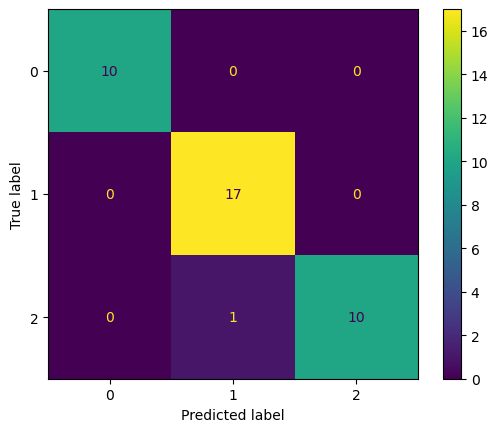

In [47]:
plt_conf = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
plt_conf.plot()
plt.show() 

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [50]:
grid_model.predict_proba(scaled_x_test)[0]

array([9.91761892e-01, 8.23810800e-03, 3.94493428e-16])

In [51]:
grid_model.predict(scaled_x_test)

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [71]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [72]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

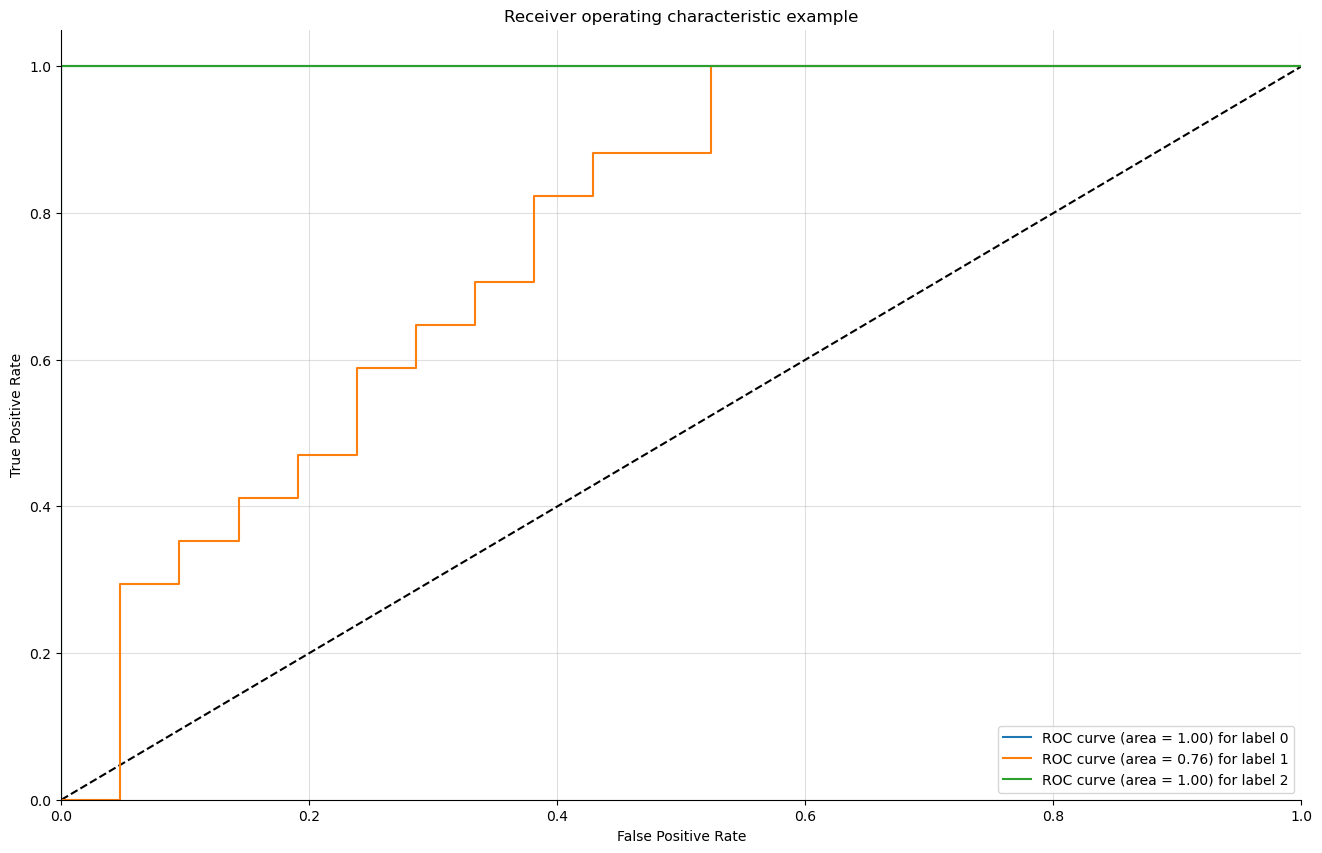

In [73]:
plot_multiclass_roc(grid_model, scaled_x_test, y_test, n_classes=3, figsize=(16, 10))